In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.decomposition import PCA

In [35]:
df = pd.read_csv('/Users/sarthaksharna/KMeans Project/data/cleaned_data.csv')

df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [36]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df)

scaled_features[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [37]:
pd.DataFrame(scaled_features , columns=['Annual Income (k$)' , 'Spending Score (1-100)']).head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


<!-- --- -->

KMEANS CLUSTERING

In [38]:
wcss = []

for i in range(1 , 11) :
    Kmeans = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 42)
    Kmeans.fit(scaled_features)
    wcss.append(Kmeans.inertia_)
    
wcss

[400.0,
 269.6910121927639,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.86475569922556,
 37.228187677585886,
 32.39226763033116,
 29.981897788243693]

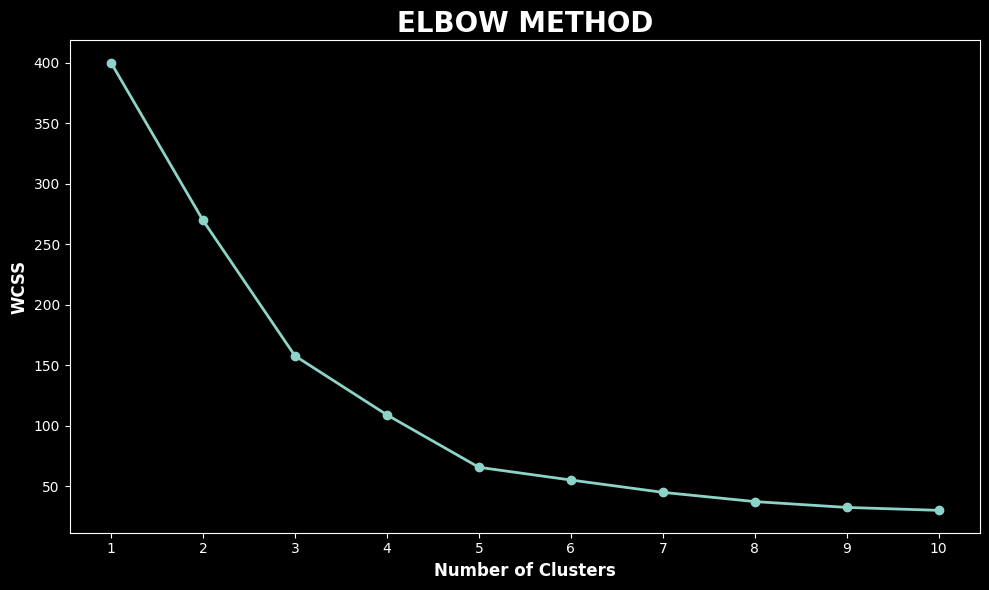

In [39]:
plt.style.use('dark_background')
plt.figure(figsize = (10 , 6))
plt.plot(range(1 , 11) , wcss , marker = 'o', linewidth = 2)

plt.title('ELBOW METHOD' , fontsize=20, color='#FFFFFF', fontweight='heavy')

plt.xticks(range(1 , 11))

plt.xlabel('Number of Clusters' , color='#FFFFFF', fontweight='bold' , fontsize=12)
plt.ylabel('WCSS' , color='#FFFFFF', fontweight='bold' , fontsize=12)

plt.tight_layout()
plt.show()

USING THE KNEED LIBRARY TO DETERMINE OPTIMAL CLUSTERS

In [40]:
from kneed import KneeLocator

knee = KneeLocator(range(1 , 11) , wcss , curve='convex', direction='decreasing')

knee.knee

5

USING SILHOUTEE SCORE TO DETERMINE OPTIMAL NUMBER OF CLUSTERS

In [41]:
silhoutte_coeff = []

for i in range(2 , 11) :
    Kmeans = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 42)
    Kmeans.fit(scaled_features)
    silhoutte_coeff.append(silhouette_score(scaled_features , Kmeans.labels_))
    
silhoutte_coeff

[0.3212707813918878,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5398800926790663,
 0.5281492781108291,
 0.4552147906587443,
 0.4570853966942764,
 0.4431713026508046]

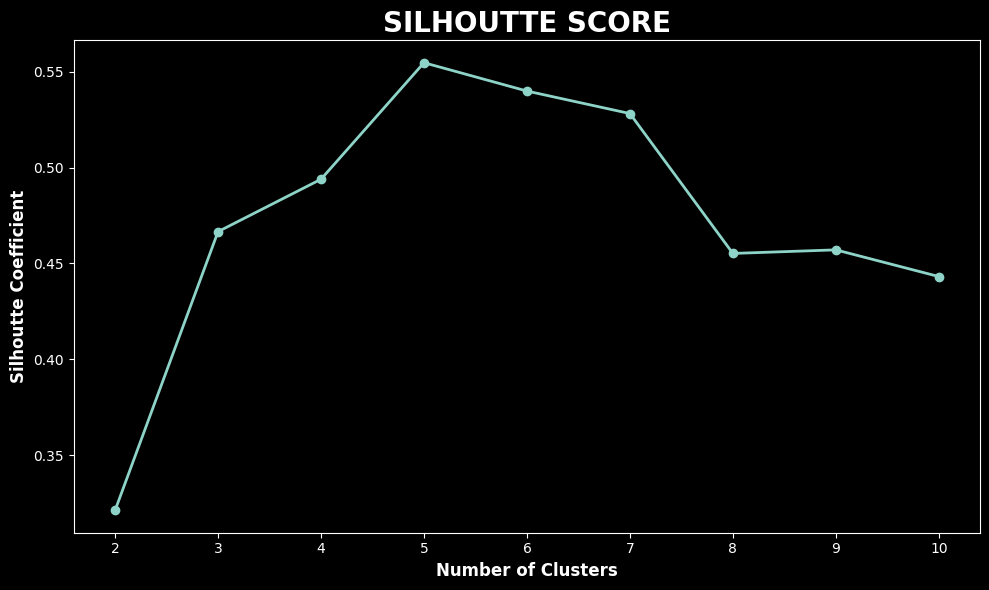

In [42]:
plt.figure(figsize = (10 , 6))

plt.plot(range(2 , 11) , silhoutte_coeff , marker = 'o', linewidth = 2)

plt.title('SILHOUTTE SCORE' , fontsize=20, color='#FFFFFF', fontweight='heavy')

plt.xticks(range(2 , 11))

plt.xlabel('Number of Clusters' , color='#FFFFFF', fontweight='bold' , fontsize=12)
plt.ylabel('Silhoutte Coefficient' , color='#FFFFFF', fontweight='bold' , fontsize=12)

plt.tight_layout()
plt.show()

THEREFORE ON OBSERVATION , OPTIMAL K = 5

In [43]:
Kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 42)

Kmeans.fit(scaled_features)

labels = Kmeans.labels_

labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [44]:
df['cluster'] = labels

df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


VISUALIZING CLUSTERS 

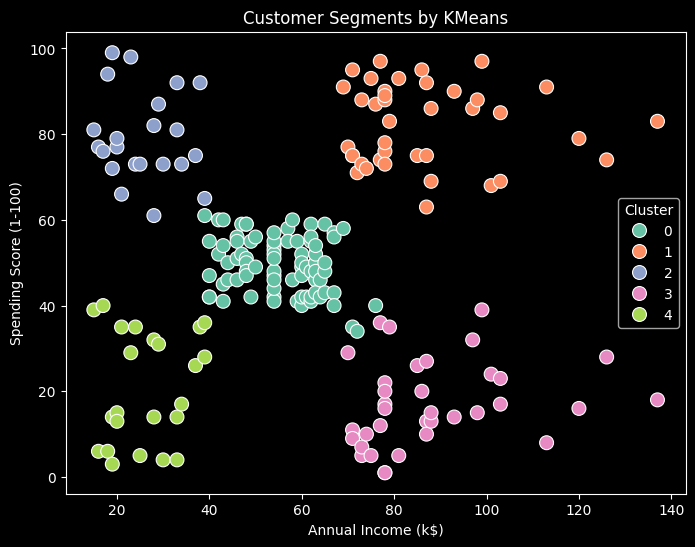

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluster',
    palette='Set2',
    s=100
)

plt.title('Customer Segments by KMeans')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [47]:
df.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


<!-- ----- -->

| Cluster | Income | Spending Score | Interpretation                 |
| ------- | ------ | -------------- | ------------------------------ |
| **0**   | \~55   | \~50           | **Mid Income, Mid Spending**   |
| **1**   | \~87   | \~82           | **High Income, High Spending** |
| **2**   | \~26   | \~79           | **Low Income, High Spending**  |
| **3**   | \~88   | \~17           | **High Income, Low Spending**  |
| **4**   | \~26   | \~21           | **Low Income, Low Spending**   |


AGLOMERATIVE CLUSTRING